In [8]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [18]:
sumissions = {}

files = os.listdir('Submissions')
for file in files:
    if file.endswith(".csv"):
        sumissions[file.replace('.csv','')] = f'Submissions/{file}'

kernal_id = []
score = []
file_path = []
x = 0
for record in sumissions:
    kernal_id.append(x)
    score.append(record)
    file_path.append(sumissions[record])
    x += 1
    
        

dfk = pd.DataFrame({ 
    'Kernel ID': kernal_id,  
    'Score':     score,   
    'File Path': file_path    
})    
    
dfk     

,Kernel ID,Score,File Path
0,0,0.69917,Submissions/0.69917.csv
1,1,0.69942,Submissions/0.69942.csv
2,2,0.69962,Submissions/0.69962.csv
3,3,0.70035,Submissions/0.70035.csv
4,4,0.70084,Submissions/0.70084.csv
5,5,0.70156,Submissions/0.70156.csv
6,6,0.72336,Submissions/0.72336.csv
7,7,0.73846,Submissions/0.73846.csv


In [19]:
def generate(main, support, coeff):
    
    g = main.copy()    
    for i in main.columns[1:]:
        
        res = []
        lm, Is = [], []        
        lm = main[i].tolist()
        ls = support[i].tolist()  
        
        for j in range(len(main)):
            res.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))            
        g[i] = res
        
    return g  

In [20]:
def drawing(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\nOn the Y axis >>> support\n')           
    plt.scatter(X, Y1, s=0.1)
    plt.show() 
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\nOn the Y axis >>> generated\n')           
    plt.scatter(X, Y2, s=0.1)
    plt.show()     
    

In [21]:
def drawing1(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nBlue | X axis >> main | Y axis >> support\n\nOrange | X axis >> main | Y axis >> generated\n') 
    
    plt.scatter(X, Y1, s=0.1)    
    plt.scatter(X, Y2, s=0.1)
    
    plt.show() 

In [22]:
def drawing2(pxy, mxy):
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nComparative Method\n\nBlue | X(main) | Y(average - smaller result)\n\nOrange | X(main) | Y(generated)\n') 
    plt.scatter(pxy[0], pxy[1], s=0.1)
    plt.scatter(pxy[0], pxy[2], s=0.1)
    plt.show() 

    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nComparative Method\n\nBlue | X(main) | Y(average - bigger results)\n\nOrange | X(main) | Y(generated)\n') 
    plt.scatter(mxy[0], mxy[1], s=0.1)
    plt.scatter(mxy[0], mxy[2], s=0.1)
    plt.show()

In [23]:
def comparison(main, majority, pcoeff, mcoeff):
    
    comp = main.copy()
    for i in main.columns[1:]:
        res = []
        pxy = [[],[],[]]
        mxy = [[],[],[]]        
        lm  = main[i].tolist() 
        ls  = [[],[],[],[],[],[],[],[],[],[],[],[]]
        for n in range (12):       
            csv   = pd.read_csv(dfk.iloc[n, 2])  
            ls[n] = csv[i].tolist() 
            
        for j in range(len(main)):
            pcount = 0
            pvalue = 0.0        
            mcount = 0
            mvalue = 0.0 
    
            for k in range (12):            
                if lm[j] > ls[k][j]:
                    pcount += 1
                    pvalue += ls[k][j]                 
                else: 
                    mcount += 1
                    mvalue += ls[k][j] 
                    
            if (pcount > majority): 
                res.append(lm[j] * pcoeff)
                pxy[2].append(lm[j] * pcoeff)                
                pxy[1].append(pvalue / pcount)
                pxy[0].append(lm[j])
                        
            elif (mcount > majority): 
                res.append(lm[j] * mcoeff)
                mxy[2].append(lm[j] * mcoeff)                
                mxy[1].append(mvalue / mcount)
                mxy[0].append(lm[j])
                        
            else: 
                res.append(lm[j])       
    
        comp[i] = res    

    drawing2(pxy, mxy)    
    return comp

In [28]:
support = pd.read_csv(dfk.iloc[0, 2])
    
for k in range (1, 7):
    main = pd.read_csv(dfk.iloc[k, 2])
    support = generate(main, support, 0.99)
    
sub1 = support 
sub1.to_csv("submissions\\submission1.csv", index=False)

In [30]:
print('sub1(Last Support)    | Score: 0.72286')
sub1.describe()

sub1(Last Support)    | Score: 0.72286


,id,target
count,200000.000000,200000.000000
mean,250261.031215,7.845724
std,144128.894365,0.334093
min,0.000000,6.201805
25%,125538.250000,7.617465
50%,250389.500000,7.829119
75%,375240.250000,8.057606
max,499990.000000,10.015540


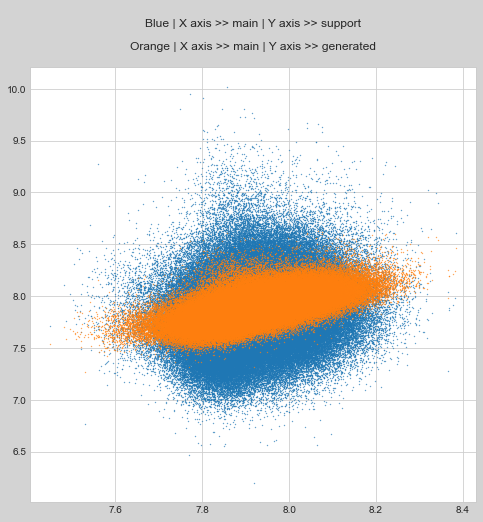

In [32]:
main = pd.read_csv(dfk.iloc[7, 2])

sub2 = generate(main, sub1, 0.65)

#drawing(main, sub1, sub2)

drawing1(main, sub1, sub2)
sub2.to_csv("submissions\\submission2.csv", index=False)

In [34]:
print('sub2    | Score: 0.69744')
sub2.describe()

sub2    | Score: 0.69744


,id,target
count,200000.000000,200000.000000
mean,250261.031215,7.898497
std,144128.894365,0.146440
min,0.000000,7.263473
25%,125538.250000,7.792989
50%,250389.500000,7.897388
75%,375240.250000,7.999835
max,499990.000000,8.626056


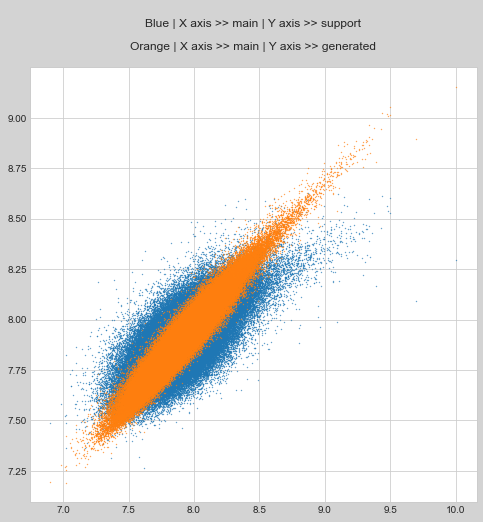

In [38]:
main = pd.read_csv(dfk.iloc[5, 2])

sub3 = generate(main, sub2, 0.50)

#drawing(main, sub2, sub3)

drawing1(main, sub2, sub3)